# MC integration
example
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (1) Define considered shape

In [2]:
# Function describing the shape in 2-D
# Domain:       -1 < x < 1
#               -1 < y < 1

def isInside(x,y) :
    r1 = x*x + y*y 
    r2 = x*x + (y+1)*(y+1)
    return np.less(r1,1)*np.greater(r2,1)    # Works also for arrays


### (2) Generate a set of random points

In [3]:
# Number of generations

Nmc = 1000000

# Generate uniform distribution

xy_tab = np.random.uniform(-1.,1.,size=(2,Nmc))

w_tab = isInside(xy_tab[0,:],xy_tab[1,:])

i_ok = np.sum(w_tab==1)
i_fail = np.sum(w_tab==0)

print("Total accepted: ",i_ok," rejected: ",i_fail)
                           

Total accepted:  478647  rejected:  521353


### (3) Plot results

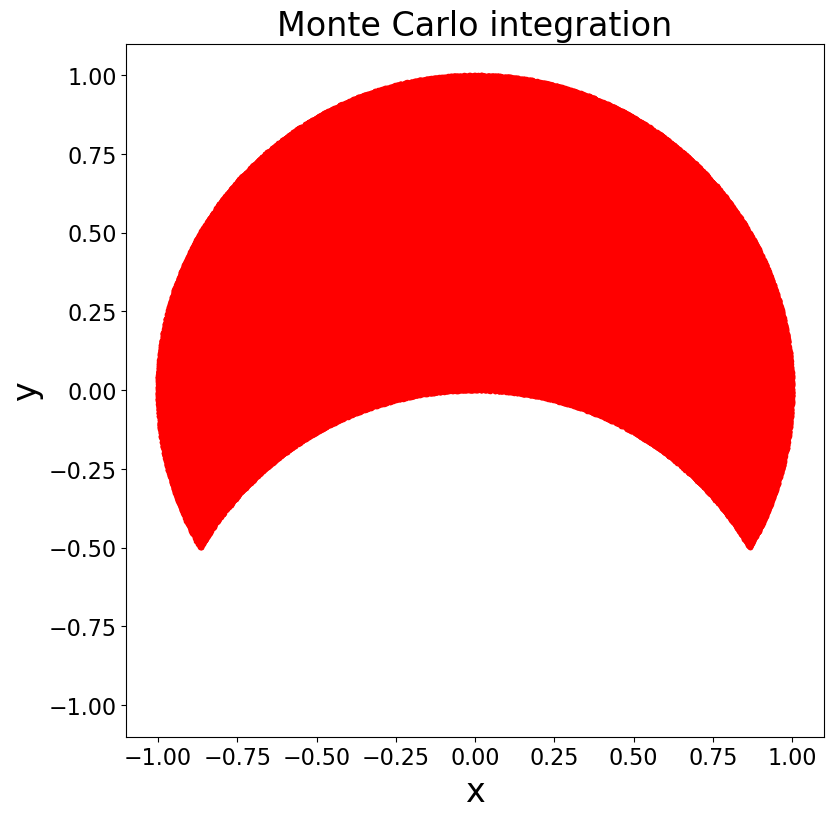

In [4]:
# Create result graph

plt.figure(figsize=(9, 9))

plt.plot(xy_tab[0,w_tab],xy_tab[1,w_tab],'o',markersize=3,markeredgecolor='red',markerfacecolor='red')

plt.title("Monte Carlo integration",size=24)
plt.xlabel('x',size=24)
plt.ylabel('y',size=24)

# Add function

plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

fname = '05_generation_2.png'
plt.savefig(fname)

plt.show()

In [5]:
# Compare results with predictions

sexp = np.pi/3. + np.sqrt(3.)/2.

pmc = np.sum(w_tab)/Nmc
emc = np.sqrt(pmc*(1-pmc)/(Nmc-1))     # Uncertainty from binomial distribution

print('Expected surface: {:.5f}'.format(sexp))
print('Generation efficiency: {:.5f} +/-{:.5f}'.format(4.*pmc,4.*emc))


Expected surface: 1.91322
Generation efficiency: 1.91459 +/-0.00200
